<a href="https://colab.research.google.com/github/aonekoda/ml_one_day/blob/main/02_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/aonekoda/ml_one_day/main/2.01.%20Admittance.csv')
data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
# Replace all No entries with 0, and all Yes entries with 1
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


### Variables

독립변수와 종속변수를 확인한다.  
로지스틱 회귀는 기본적으로 종속변수가 이항인 모형이다.

In [4]:
# Create the dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

### Scatter plot

읽어들인 데이터의 산점도를 그려본다.

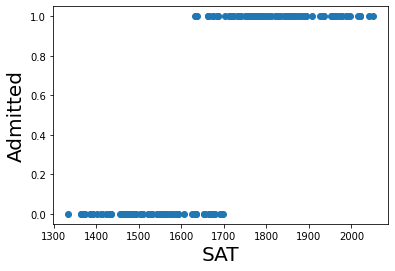

In [5]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Define Logistic Regression Model



In [6]:
X = x1.values.reshape(-1,1)

In [7]:
model_sk = LogisticRegression(solver='liblinear',C=100.0)
model_sk.fit(X, y)

LogisticRegression(C=100.0, solver='liblinear')

In [8]:
print(model_sk.intercept_, model_sk.coef_)

[-30.55733617] [[0.01842716]]


### 규제를 사용하여 과대 적합 방지
LogisticRegression의 파라미터 C는 규제의 정도를 제어한다.  
규제를 사용하여 모형의 복잡도를 조정할 수 있다. 규제는 모형의 훈련과정에서 가중치(계수)를 줄이는 역할을 한다. 

* L1 - 중요한 변수만을 남긴다.(계수가 0이 되는 경우가 있다.)
* L2 - 기본값. 중요하지 않은 변수의 weight값을 0에 가깝게 규제한다.
* LogisticRegression의 penalty의 기본값은 'l2', 'l1'으로 변경가능
* L2 규제 regularization 가중치 감쇠
* L1 규제(feature selection)는 가중치를 0으로 만든다.
* 규제는 다중 공선성 해결에 도움
* 규제는 과대 적합을 방지
* 매개변수 C로 규제의 정도를 제어한다.
* C의 값을 감소하면 규제의 강도가 증가한다. 모형을 단순화하여 과대적합(overfitting)을 방지한다.

### Plot Logistic Regression Curve

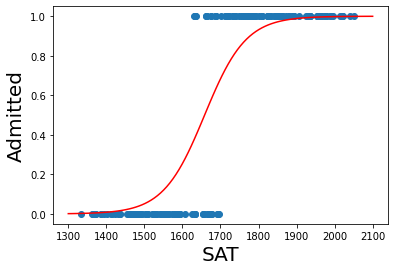

In [9]:
xx = np.linspace(1300, 2100,100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(xx,mu,'r')
plt.show()

### Prediction 

새로운 값으로 예측을 수행한다.

In [10]:
model_sk.predict([[1520]])

array([0])

In [11]:
model_sk.predict([[1980]])

array([1])

In [12]:
model_sk.predict_proba([[1980]])

array([[0.00265553, 0.99734447]])

# Multi-Class Logistic Regression


* 사이킷런에서 붓꽃 데이터셋을 적재합니다. 
* 클래스는 이미 정수 레이블로 변환되어 있습니다. 
* 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 입니다.

In [13]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


### 데이터 분할하기

70%는 훈련 데이터 30%는 테스트 데이터로 분할합니다:

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


### Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 결정 경계 시각화

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)

### MultiClass Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='auto', C=.1, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, random_state=1)

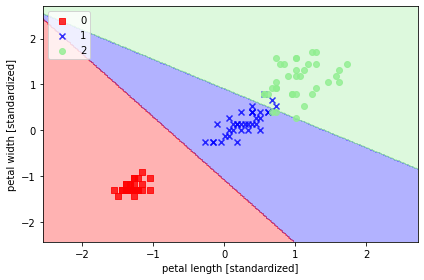

In [20]:
plot_decision_regions(X_train_std, y_train,
                      classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Prediction

In [21]:
# 테스트 데이터 
X_test_std[:1, :]

array([[0.89820289, 1.44587881]])

In [22]:
# 로지스틱 회귀 모형으로 class 예측
lr.predict(X_test_std[:1, :])

array([2])

In [23]:
# 로지스틱 회귀 모형에서 각 class에 대한 예측확률을 확인
lr.predict_proba(X_test_std[:1, :])

array([[0.01169119, 0.25543892, 0.7328699 ]])